# Tutorial 5  for JetSeT 

# Model fitting 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs
import numpy as np
import warnings
warnings.filterwarnings('ignore')

/var/folders/s7/r9g9gczx6_l06sdj1hh494_r0000gn/T/ipykernel_41851/961817616.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
test_SEDs

['/Users/orion/anaconda3/envs/py3.9_pip/lib/python3.9/site-packages/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/anaconda3/envs/py3.9_pip/lib/python3.9/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv',
 '/Users/orion/anaconda3/envs/py3.9_pip/lib/python3.9/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_ABS.ecsv',
 '/Users/orion/anaconda3/envs/py3.9_pip/lib/python3.9/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_DEABS.ecsv']

## loading data



In [3]:
data=Data.from_file(test_SEDs[2])


In [4]:
data.table

x,dx,y,dy,T_start,T_stop,UL,data_set
Hz,Hz,erg / (cm2 s),erg / (cm2 s),MJD,MJD,,
float64,float64,float64,float64,float64,float64,bool,str3
2299540000.0,0.0,3.6892e-14,2.668e-15,0.0,0.0,False,0.0
2639697000.0,0.0,4.12456e-14,9.712535e-26,0.0,0.0,False,0.0
4799040000.0,0.0,7.0368e-14,4.8e-16,0.0,0.0,False,0.0
4805039000.0,0.0,5.435586e-14,5.435586e-15,0.0,0.0,False,0.0
4805039000.0,0.0,3.239547e-14,3.239547e-15,0.0,0.0,False,0.0
4843552000.0,0.0,7.174767e-14,7.333333e-26,0.0,0.0,False,0.0
4999750000.0,0.0,8e-14,3.344772e-15,0.0,0.0,False,0.0
7698460000.0,0.0,1.15577e-13,6.16e-16,0.0,0.0,False,0.0



***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2



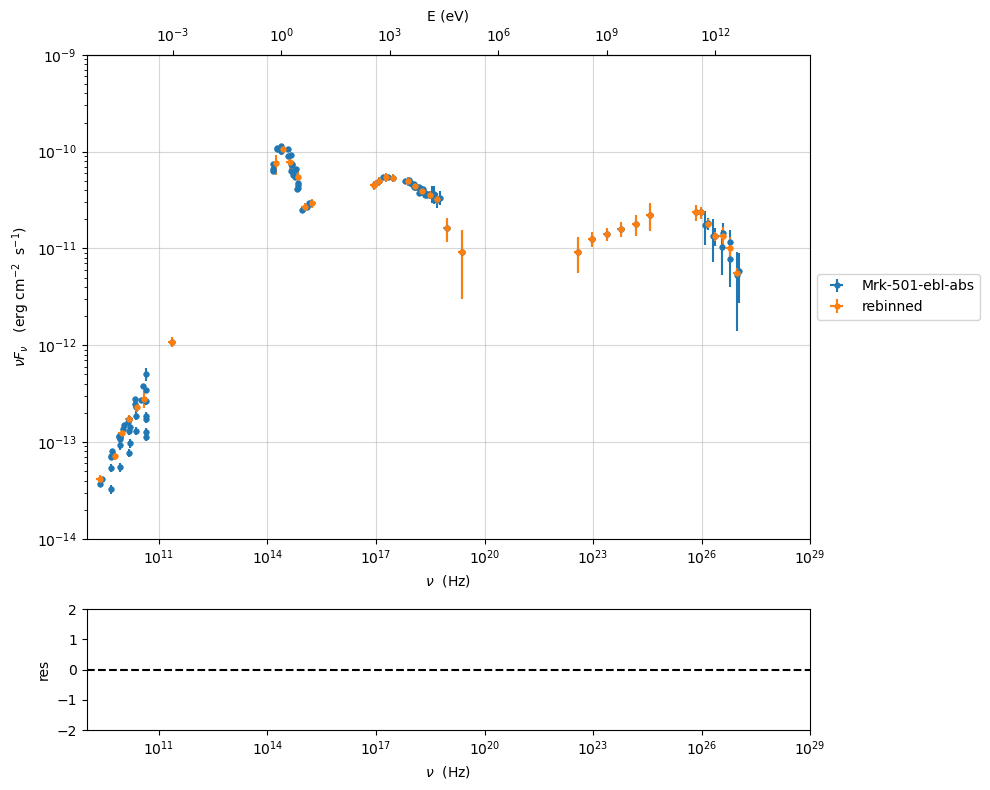

In [5]:
%matplotlib inline
sed_data=ObsData(data_table=data)
myPlot=sed_data.plot_sed()

sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.1,[10.**6,10.**29])
myPlot.add_data_plot(sed_data,label='rebinned')
myPlot.setlim(y_min=1E-14,y_max=1E-9,x_min=1E9,x_max=1E29)

In [6]:
sed_data.table

nu_data,dnu_data,nuFnu_data,dnuFnu_data,nu_data_log,dnu_data_log,nuFnu_data_log,dnuFnu_data_log,dnuFnu_fake,dnuFnu_fake_log,UL,zero_error,T_start,T_stop,data_set
Hz,Hz,erg / (cm2 s),erg / (cm2 s),Hz,Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),,,,MJD,MJD,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,float64,float64,bytes16
2347263231.564593,540477332.6333663,4.124559999999995e-14,4.1245599999999946e-15,9.370561795864282,0.1,-13.384622374329622,0.043429448190325175,8.249119999999989e-15,0.2,False,False,0.0,0.0,0.0
5965354674.842971,1373573674.871577,7.174766999999987e-14,7.174766999999988e-15,9.7756362700932,0.1,-13.144192198044472,0.04342944819032519,1.4349533999999977e-14,0.2,False,False,0.0,0.0,0.0
9509846505.090975,2189723079.9284005,1.2257712070025038e-13,1.933421242541737e-14,9.978173507207659,0.1,-12.911590584311037,0.06850170505177235,2.4515424140050076e-14,0.2,False,False,0.0,0.0,0.0
15160402939.959587,3490811781.3334055,1.7286399999999977e-13,1.7286399999999977e-14,10.180710744322118,0.1,-12.762295441828662,0.04342944819032518,3.4572799999999955e-14,0.2,False,False,0.0,0.0,0.0
24168404524.604527,5564980797.980423,2.286560000000002e-13,2.2865600000000024e-14,10.383247981436577,0.1,-12.640817398120154,0.043429448190325175,4.573120000000005e-14,0.2,False,False,0.0,0.0,0.0
38528776548.89571,8871578653.278585,2.808997324911027e-13,5.387881989554782e-14,10.585785218551036,0.1,-12.551448674389356,0.08330116217834671,5.6179946498220545e-14,0.2,False,False,0.0,0.0,0.0
224991099999.99973,51806115291.63321,1.083e-12,1.1903603252358548e-13,11.352165339012089,0.1,-11.96537154337468,0.04773471105507773,2.166e-13,0.2,False,False,0.0,0.0,0.0
170394466308232.7,39234775805001.28,7.547087036820695e-11,1.7911369264245145e-11,14.231455486611301,0.1,-10.12222064147634,0.10307034749754382,1.509417407364139e-11,0.2,False,False,0.0,0.0,0.0


## phenomenological model constraining

### spectral indices


*** evaluating spectral indices for data ***



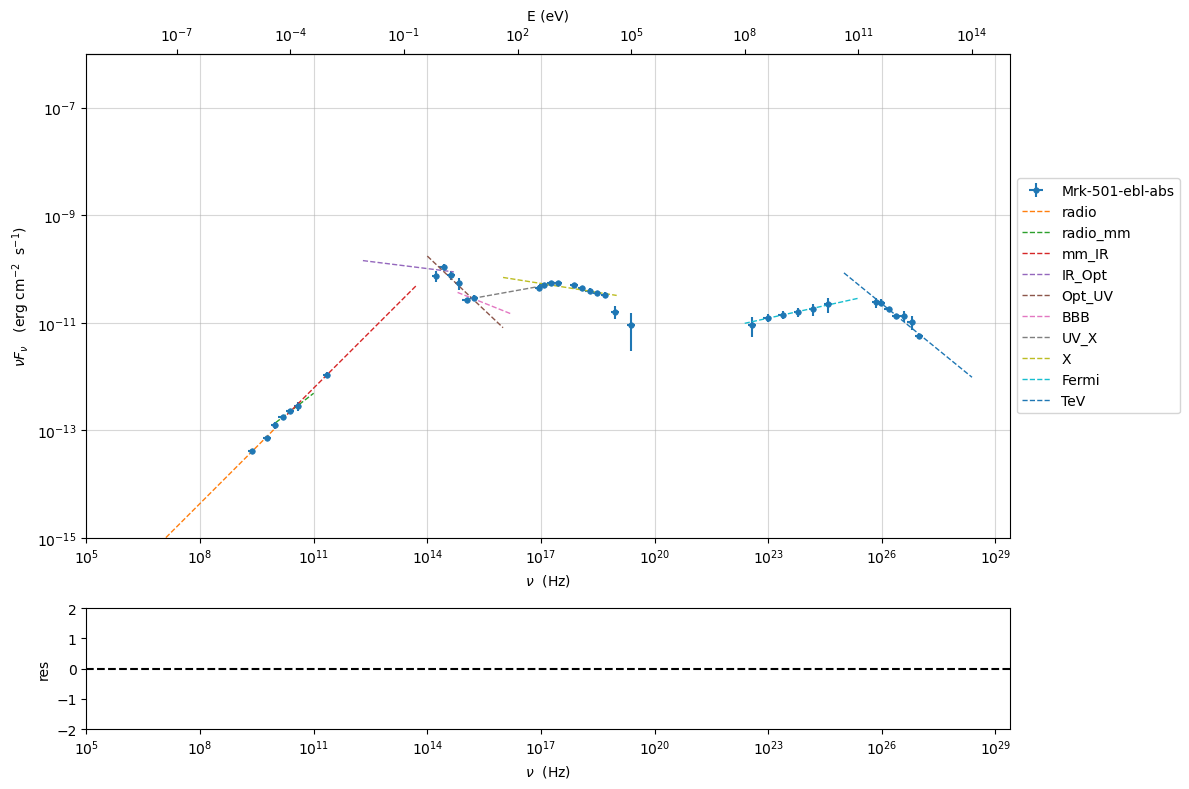

In [7]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.setlim(y_min=1E-15,y_max=1E-6)

### sed shaper

In [8]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

---> class:  HSP




model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-6.411144e-02,-6.411144e-02,7.838957e-03,--,-4.778765e-02,-1.000000e+01,0.000000e+00,False
LogCubic,c,-1.751707e-03,-1.751707e-03,1.127021e-03,--,3.576199e-03,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,1.703747e+01,1.703747e+01,9.437332e-02,--,1.626870e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.030068e+01,-1.030068e+01,1.884116e-02,--,-1.025412e+01,-3.000000e+01,0.000000e+00,False
host_galaxy,nuFnu_p_host,-1.006556e+01,-1.006556e+01,5.462494e-02,--,-1.025412e+01,-1.225412e+01,-8.254123e+00,False
host_galaxy,nu_scale,1.730750e-02,1.730750e-02,3.694862e-03,--,0.000000e+00,-5.000000e-01,5.000000e-01,False


---> sync       nu_p=+1.703747e+01 (err=+9.437332e-02)  nuFnu_p=-1.030068e+01 (err=+1.884116e-02) curv.=-6.411144e-02 (err=+7.838957e-03)



In [9]:
best_fit.show_report()

-------------------------------------------------------------------------
Fit report

Model: sync-shape-fit


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
LogCubic,b,curvature,,-6.411144e-02,-1.000000e+01,0.000000e+00,False,False
LogCubic,c,third-degree,,-1.751707e-03,-1.000000e+01,1.000000e+01,False,False
LogCubic,Ep,peak freq,Hz,1.703747e+01,0.000000e+00,3.000000e+01,True,False
LogCubic,Sp,peak flux,erg / (cm2 s),-1.030068e+01,-3.000000e+01,0.000000e+00,True,False
host_galaxy,nuFnu_p_host,nuFnu-scale,erg / (cm2 s),-1.006556e+01,-2.000000e+01,2.000000e+01,False,False
host_galaxy,nu_scale,nu-scale,Hz,1.730750e-02,-2.000000e+00,2.000000e+00,False,False



converged=True
calls=12
mesg=


'The relative error between two consecutive iterates is at most 0.000000'

dof=15
chisq=15.371958, chisq/red=1.024797 null hypothesis sig=0.424971

stats without the UL
dof  UL=15
chisq=15.371958, chisq/red=1.024797 null hypothesis sig=0.424971


best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-6.411144e-02,-6.411144e-02,7.838957e-03,--,-4.778765e-02,-1.000000e+01,0.000000e+00,False
LogCubic,c,-1.751707e-03,-1.751707e-03,1.127021e-03,--,3.576199e-03,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,1.703747e+01,1.703747e+01,9.437332e-02,--,1.626870e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.030068e+01,-1.030068e+01,1.884116e-02,--,-1.025412e+01,-3.000000e+01,0.000000e+00,False
host_galaxy,nuFnu_p_host,-1.006556e+01,-1.006556e+01,5.462494e-02,--,-1.025412e+01,-1.225412e+01,-8.254123e+00,False
host_galaxy,nu_scale,1.730750e-02,1.730750e-02,3.694862e-03,--,0.000000e+00,-5.000000e-01,5.000000e-01,False


-------------------------------------------------------------------------




*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit
-------------------------------------------------------------------------
Fit report

Model: IC-shape-fit


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
LogCubic,b,curvature,,-1.565399e-01,-1.000000e+01,0.000000e+00,False,False
LogCubic,c,third-degree,,-4.351917e-02,-1.000000e+01,1.000000e+01,False,False
LogCubic,Ep,peak freq,Hz,2.529709e+01,0.000000e+00,3.000000e+01,True,False
LogCubic,Sp,peak flux,erg / (cm2 s),-1.058825e+01,-3.000000e+01,0.000000e+00,True,False



converged=True
calls=50
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.632                      │              Nfcn = 50               │
│ EDM = 1.7e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │  -0.157   │   0.026   │            │            │   -10   │    0    │       │
│ 1 │ par_1 │  -0.044   │   0.020   │            │            │   -10   │   10    │       │
│ 2 │ par_2 │   25.30   │   0.18    │            │            │    0    │   30    │       │
│ 3 │ par_3 │  -10.59   │   0.05    │            │            │   -30   │    0    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3 │
├───────┼─────────────────────────────────────────┤
│ par_0 │  0.000651   0.00033  -0.00289 -9.45e-05 │
│ par_1 │   0.00033  0.000413  -0.00348  0.000582 │
│ par_2 │  -0.00289  -0.00348     0.033  -0.00612 │
│ par_3 │ -9.45e-05  0.000582  -0.00612   0.00255 │
└───────┴─────────────────────────────────────────┘

dof=7
chisq=2.631978, chisq/red=0.375997 null hypothesis sig=0.916836

stats without the UL
dof  UL=7
chisq=2.631978, chisq/red=0.375997 null hypothesis sig=0.916836


best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.565399e-01,-1.565399e-01,2.551782e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-4.351917e-02,-4.351917e-02,2.032069e-02,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.529709e+01,2.529709e+01,1.817244e-01,--,2.536916e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.058825e+01,-1.058825e+01,5.046952e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


-------------------------------------------------------------------------





model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.565399e-01,-1.565399e-01,2.551782e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-4.351917e-02,-4.351917e-02,2.032069e-02,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.529709e+01,2.529709e+01,1.817244e-01,--,2.536916e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.058825e+01,-1.058825e+01,5.046952e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


---> IC         nu_p=+2.529709e+01 (err=+1.817244e-01)  nuFnu_p=-1.058825e+01 (err=+5.046952e-02) curv.=-1.565399e-01 (err=+2.551782e-02)



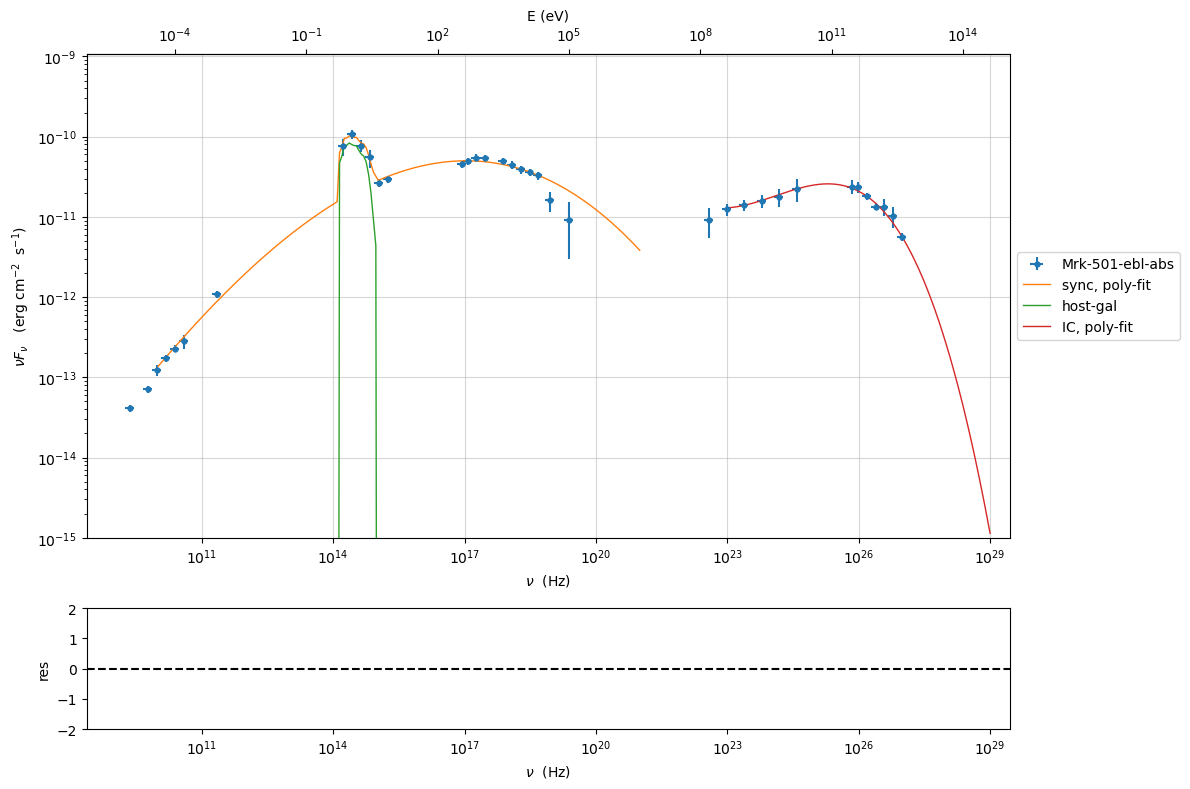

In [10]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.setlim(y_min=1E-15)

### model constraining

In [11]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False, silent=False)
prefit_jet.save_model('prefit_jet_gal_templ.pkl')


***  constrains parameters from observable ***


---> ***  emitting region parameters  ***

---> setting par type redshift, corresponding to par z_cosm

---> setting par type magnetic_field, corresponding to par B=5.050000e-02

---> setting par type region_size, corresponding to par R=1.879504e+17
---> completed True


---> *** electron distribution parameters ***
---> emitters distribution spectral type lp
---> emitters distribution name lppl

---> r elec. spec. curvature =3.205572e-01
---> setting par type curvature, corresponding to par r

---> s_radio_mm -0.4550181897119767 1.9100363794239534
---> s_X 3.222980305950095
---> s_Fermi 1.7513182652424293
---> s_UV_X 2.7462552767002855
---> s_Opt_UV -1.6658905043028298 4.33178100860566
---> s from synch log-log fit -1.0
---> s from (s_Fermi + s_UV)/2
---> power-law index s, class obj=HSP s chosen is 2.248787
---> setting par type LE_spectral_slope, corresponding to par s
---> task completed True

---> setting gamma_3p_Sync= 1.553082e+0

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,1.057086e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,5.050000e-02,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,2.500000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,3.360000e-02,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.487509e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.310708e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,2.989976e+01,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.045837e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,s,LE_spectral_slope,,2.248787e+00,-1.000000e+01,1.000000e+01,False,False


eval_model




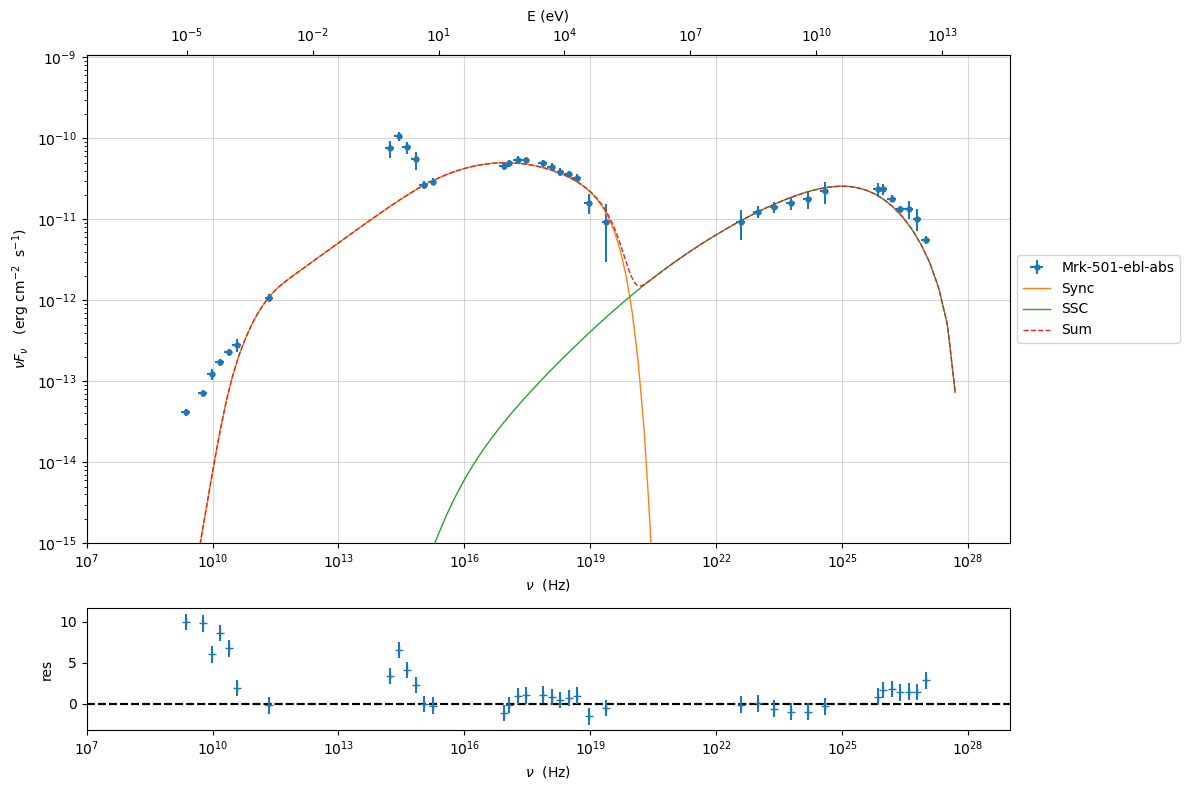

In [12]:
#this is needed only on the binder
prefit_jet.eval()
#

pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.setlim(y_min=1E-15,x_min=1E7,x_max=1E29)

## Model fitting

### Model fitting with LSB

In [13]:
from jetset.minimizer import ModelMinimizer
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet

jet_lsb=Jet.load_model('prefit_jet_gal_templ.pkl')
jet_lsb.set_gamma_grid_size(200)

fit_model_lsb=FitModel( jet=jet_lsb, name='SSC-best-fit-lsb',template=my_shape.host_gal) 
fit_model_lsb.freeze(jet_lsb,'z_cosm')
fit_model_lsb.freeze(jet_lsb,'R_H')
fit_model_lsb.jet_leptonic.parameters.beam_obj.fit_range=[5,50]
fit_model_lsb.jet_leptonic.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_lsb.jet_leptonic.parameters.gmax.fit_range=[1E4,1E8]
#fit_model_lsb.jet_leptonic.parameters.gmax.val=2.6E7
#fit_model_lsb.jet_leptonic.parameters.gmin.val=100

fit_model_lsb.host_galaxy.parameters.nuFnu_p_host.frozen=False
fit_model_lsb.host_galaxy.parameters.nu_scale.frozen=True
fit_model_lsb.jet_leptonic.nu_size=200
fit_model_lsb.jet_leptonic.IC_nu_size=100
fit_model_lsb.jet_leptonic._blob.adaptive_e_binning=0
model_minimizer_lsb=ModelMinimizer('lsb')
best_fit_lsb=model_minimizer_lsb.fit(fit_model_lsb,sed_data,1E11,1E29,fitname='SSC-best-fit-lsb',repeat=3)


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.487509e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.310708e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,2.989976e+01,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.045837e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,s,LE_spectral_slope,,2.248787e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,r,spectral_curvature,,3.205572e-01,-1.500000e+01,1.500000e+01,False,False
jet_leptonic,R,region_size,cm,1.057086e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,5.050000e-02,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,2.500000e+01,1.000000e-04,--,False,False


filtering data in fit range = [1.000000e+11,1.000000e+29]
data length 31

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=8.87760e+00

fit run: 1
- old chisq=8.87760e+00


0it [00:00, ?it/s]

- best chisq=8.87760e+00

fit run: 2
- old chisq=8.87760e+00


0it [00:00, ?it/s]

- best chisq=8.87760e+00

-------------------------------------------------------------------------
Fit report

Model: SSC-best-fit-lsb


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.040258e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.603057e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,3.203349e+01,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,5.296551e+03,1.000000e+00,1.000000e+09,False,False
jet_leptonic,s,LE_spectral_slope,,2.185218e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,r,spectral_curvature,,2.372804e-01,-1.500000e+01,1.500000e+01,False,False
jet_leptonic,R,region_size,cm,1.167483e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,2.814552e-02,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,3.185430e+01,1.000000e-04,--,False,False



converged=True
calls=19
mesg=


'The relative error between two consecutive iterates is at most 0.000000'

dof=21
chisq=8.877599, chisq/red=0.422743 null hypothesis sig=0.990145

best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
jet_leptonic,gmin,1.040258e+02,1.040258e+02,4.018984e+02,--,1.487509e+02,1.000000e+00,1.000000e+09,False
jet_leptonic,gmax,1.603057e+06,1.603057e+06,1.599445e+06,--,2.310708e+06,1.000000e+04,1.000000e+08,False
jet_leptonic,N,3.203349e+01,3.203349e+01,2.222016e+02,--,2.989976e+01,0.000000e+00,--,False
jet_leptonic,gamma0_log_parab,5.296551e+03,5.296551e+03,9.389924e+03,--,1.045837e+04,1.000000e+00,1.000000e+09,False
jet_leptonic,s,2.185218e+00,2.185218e+00,1.491891e-01,--,2.248787e+00,-1.000000e+01,1.000000e+01,False
jet_leptonic,r,2.372804e-01,2.372804e-01,4.455028e-02,--,3.205572e-01,-1.500000e+01,1.500000e+01,False
jet_leptonic,R,1.167483e+16,1.167483e+16,3.358105e+16,--,1.057086e+16,3.162278e+15,3.162278e+17,False
jet_leptonic,R_H,1.000000e+17,--,--,--,1.000000e+17,0.000000e+00,--,True
jet_leptonic,B,2.814552e-02,2.814552e-02,2.460438e-02,--,5.050000e-02,0.000000e+00,--,False
jet_leptonic,beam_obj,3.185430e+01,3.185430e+01,3.579577e+01,--,2.500000e+01,5.000000e+00,5.000000e+01,False


-------------------------------------------------------------------------




In [14]:
best_fit_lsb.save_report()
best_fit_lsb.bestfit_table

model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str12,str16,float64,float64,float64,float64,float64,float64,float64,bool
jet_leptonic,gmin,1.040258e+02,1.040258e+02,4.018984e+02,--,1.487509e+02,1.000000e+00,1.000000e+09,False
jet_leptonic,gmax,1.603057e+06,1.603057e+06,1.599445e+06,--,2.310708e+06,1.000000e+04,1.000000e+08,False
jet_leptonic,N,3.203349e+01,3.203349e+01,2.222016e+02,--,2.989976e+01,0.000000e+00,--,False
jet_leptonic,gamma0_log_parab,5.296551e+03,5.296551e+03,9.389924e+03,--,1.045837e+04,1.000000e+00,1.000000e+09,False
jet_leptonic,s,2.185218e+00,2.185218e+00,1.491891e-01,--,2.248787e+00,-1.000000e+01,1.000000e+01,False
jet_leptonic,r,2.372804e-01,2.372804e-01,4.455028e-02,--,3.205572e-01,-1.500000e+01,1.500000e+01,False
jet_leptonic,R,1.167483e+16,1.167483e+16,3.358105e+16,--,1.057086e+16,3.162278e+15,3.162278e+17,False
jet_leptonic,R_H,1.000000e+17,--,--,--,1.000000e+17,0.000000e+00,--,True
jet_leptonic,B,2.814552e-02,2.814552e-02,2.460438e-02,--,5.050000e-02,0.000000e+00,--,False


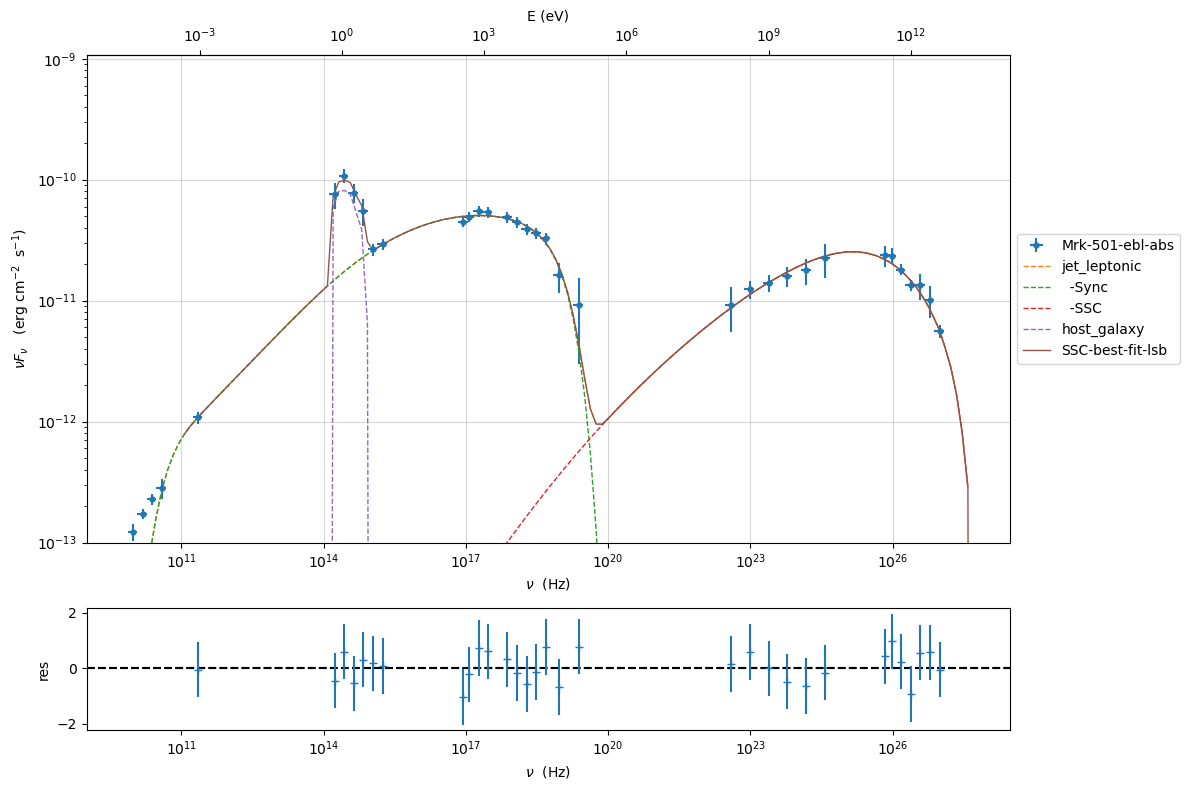

In [15]:
%matplotlib inline
fit_model_lsb.set_nu_grid(1E6,1E30,200)
fit_model_lsb.eval()
p2=fit_model_lsb.plot_model(sed_data=sed_data)
p2.setlim(y_min=1E-13,x_min=1E9,x_max=3E28)

### Model fitting with a bkn pl


In [16]:
from jetset.obs_constrain import ObsConstrain
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='bkn',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False,silent=True)
prefit_jet.save_model('prefit_jet_bkn_gal_templ.pkl')


***  constrains parameters from observable ***



model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.832651e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,6.040895e-02,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,2.500000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,3.360000e-02,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.360050e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.112711e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,6.558185e+01,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,1.420003e+05,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,2.248787e+00,-1.000000e+01,1.000000e+01,False,False


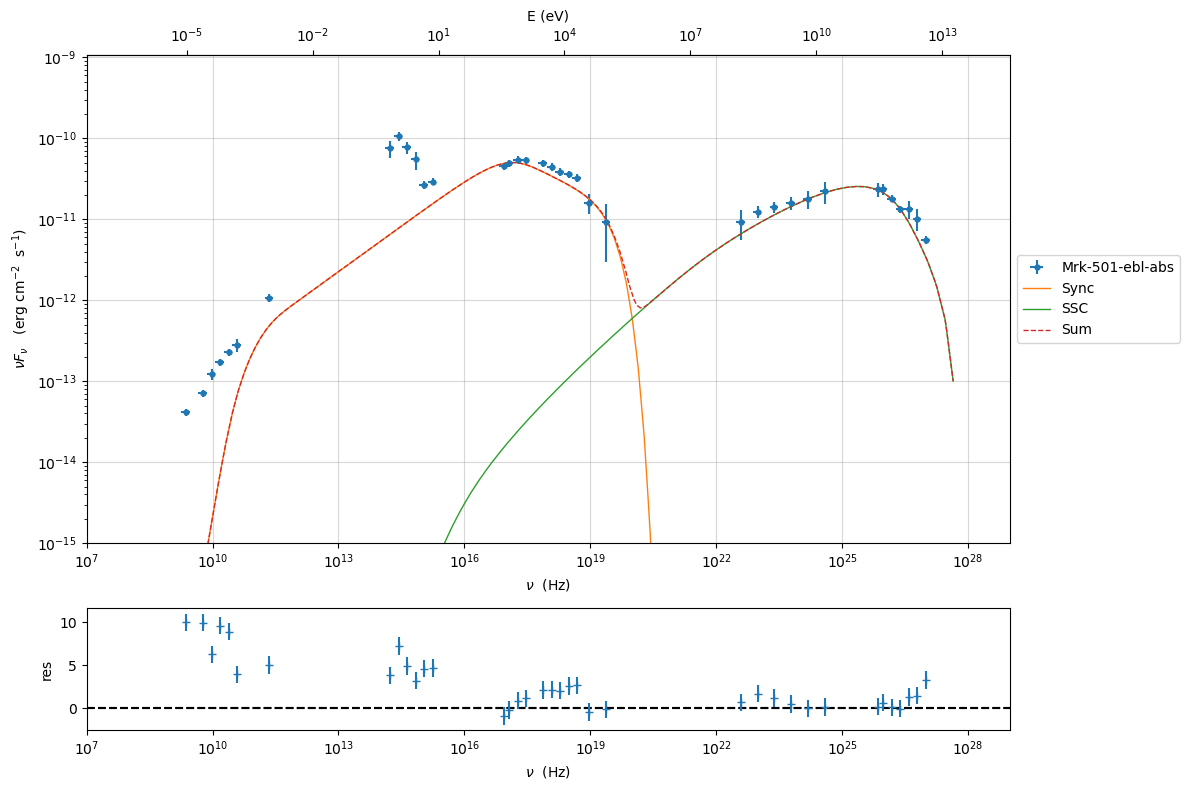

In [17]:
prefit_jet.eval()
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.setlim(y_min=1E-15,x_min=1E7,x_max=1E29)

In [18]:
jet_minuit_bkn=Jet.load_model('prefit_jet_bkn_gal_templ.pkl')
jet_minuit_bkn.set_gamma_grid_size(200)

fit_model_lsb_bkn=FitModel( jet=jet_minuit_bkn, name='SSC-best-fit-bkn-lsb',template=my_shape.host_gal) 


fit_model_lsb_bkn.freeze(jet_lsb,'z_cosm')
fit_model_lsb_bkn.freeze(jet_lsb,'R_H')
fit_model_lsb_bkn.jet_leptonic.parameters.beam_obj.fit_range=[5,50]
fit_model_lsb_bkn.jet_leptonic.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_lsb_bkn.jet_leptonic.parameters.gmax.fit_range=[1E4,1E8]
fit_model_lsb_bkn.host_galaxy.parameters.nuFnu_p_host.frozen=False
fit_model_lsb_bkn.host_galaxy.parameters.nu_scale.frozen=True

model_minimizer_lsb_bkn=ModelMinimizer('lsb')
best_fit_lsb_bkn=model_minimizer_lsb_bkn.fit(fit_model_lsb_bkn,sed_data,1E11,1E29,fitname='SSC-best-fit-lsb',repeat=3)






model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.360050e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.112711e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,6.558185e+01,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,1.420003e+05,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,2.248787e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.500000e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R,region_size,cm,5.832651e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,6.040895e-02,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,2.500000e+01,1.000000e-04,--,False,False


filtering data in fit range = [1.000000e+11,1.000000e+29]
data length 31

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=9.45535e+00

fit run: 1
- old chisq=9.45535e+00


0it [00:00, ?it/s]

- best chisq=9.45535e+00

fit run: 2
- old chisq=9.45535e+00


0it [00:00, ?it/s]

- best chisq=9.45535e+00

-------------------------------------------------------------------------
Fit report

Model: SSC-best-fit-lsb


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.810114e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.214902e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,3.506847e+01,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,4.801298e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,2.305647e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.012752e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R,region_size,cm,7.048365e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,3.293990e-02,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,3.903687e+01,1.000000e-04,--,False,False



converged=True
calls=20
mesg=


'The relative error between two consecutive iterates is at most 0.000000'

dof=21
chisq=9.455348, chisq/red=0.450255 null hypothesis sig=0.985155

best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
jet_leptonic,gmin,1.810114e+02,1.810114e+02,2.955055e+02,--,1.360050e+02,1.000000e+00,1.000000e+09,False
jet_leptonic,gmax,1.214902e+06,1.214902e+06,1.137164e+06,--,2.112711e+06,1.000000e+04,1.000000e+08,False
jet_leptonic,N,3.506847e+01,3.506847e+01,1.599527e+02,--,6.558185e+01,0.000000e+00,--,False
jet_leptonic,gamma_break,4.801298e+04,4.801298e+04,5.237616e+04,--,1.420003e+05,1.000000e+00,1.000000e+09,False
jet_leptonic,p,2.305647e+00,2.305647e+00,1.375299e-01,--,2.248787e+00,-1.000000e+01,1.000000e+01,False
jet_leptonic,p_1,3.012752e+00,3.012752e+00,6.113537e-02,--,3.500000e+00,-1.000000e+01,1.000000e+01,False
jet_leptonic,R,7.048365e+15,7.048365e+15,1.845483e+16,--,5.832651e+15,3.162278e+15,3.162278e+17,False
jet_leptonic,R_H,1.000000e+17,--,--,--,1.000000e+17,0.000000e+00,--,True
jet_leptonic,B,3.293990e-02,3.293990e-02,3.438285e-02,--,6.040895e-02,0.000000e+00,--,False
jet_leptonic,beam_obj,3.903687e+01,3.903687e+01,3.481872e+01,--,2.500000e+01,5.000000e+00,5.000000e+01,False


-------------------------------------------------------------------------




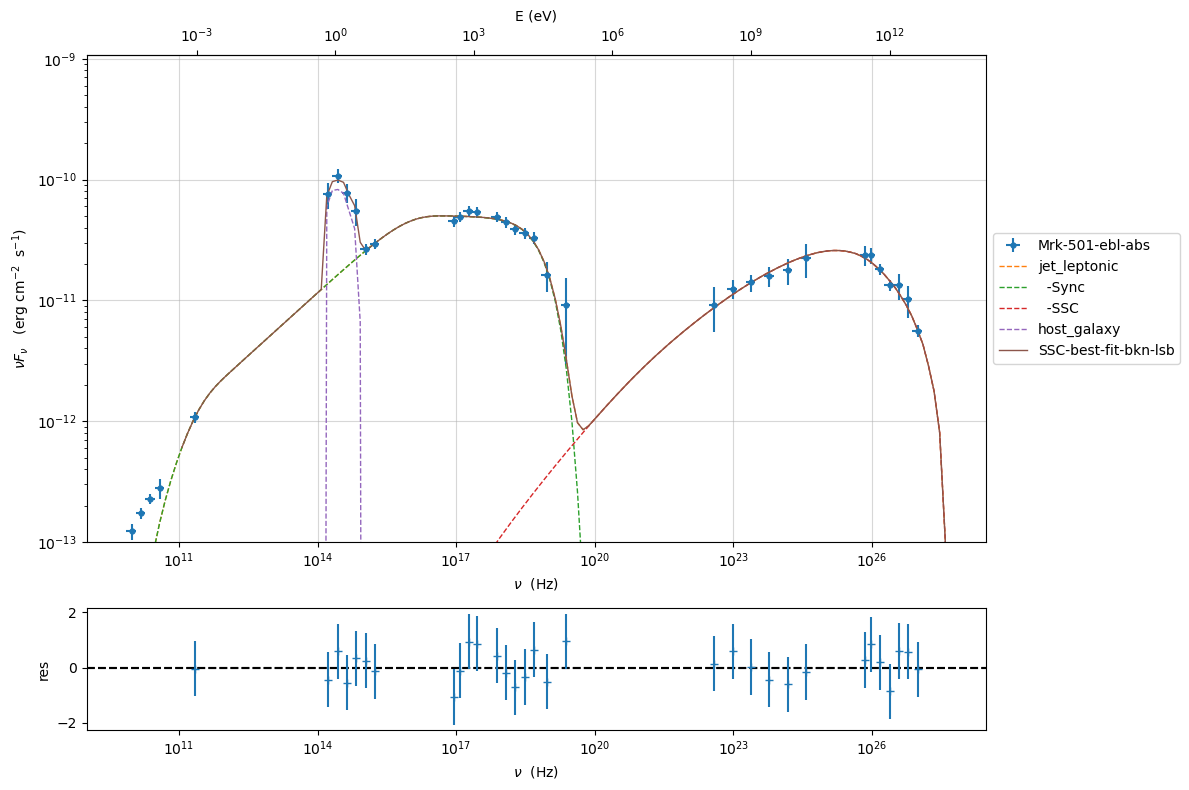

In [19]:
%matplotlib inline
fit_model_lsb_bkn.set_nu_grid(1E6,1E30,200)
fit_model_lsb_bkn.eval()
p2=fit_model_lsb_bkn.plot_model(sed_data=sed_data)
p2.setlim(y_min=1E-13,x_min=1E9,x_max=3E28)

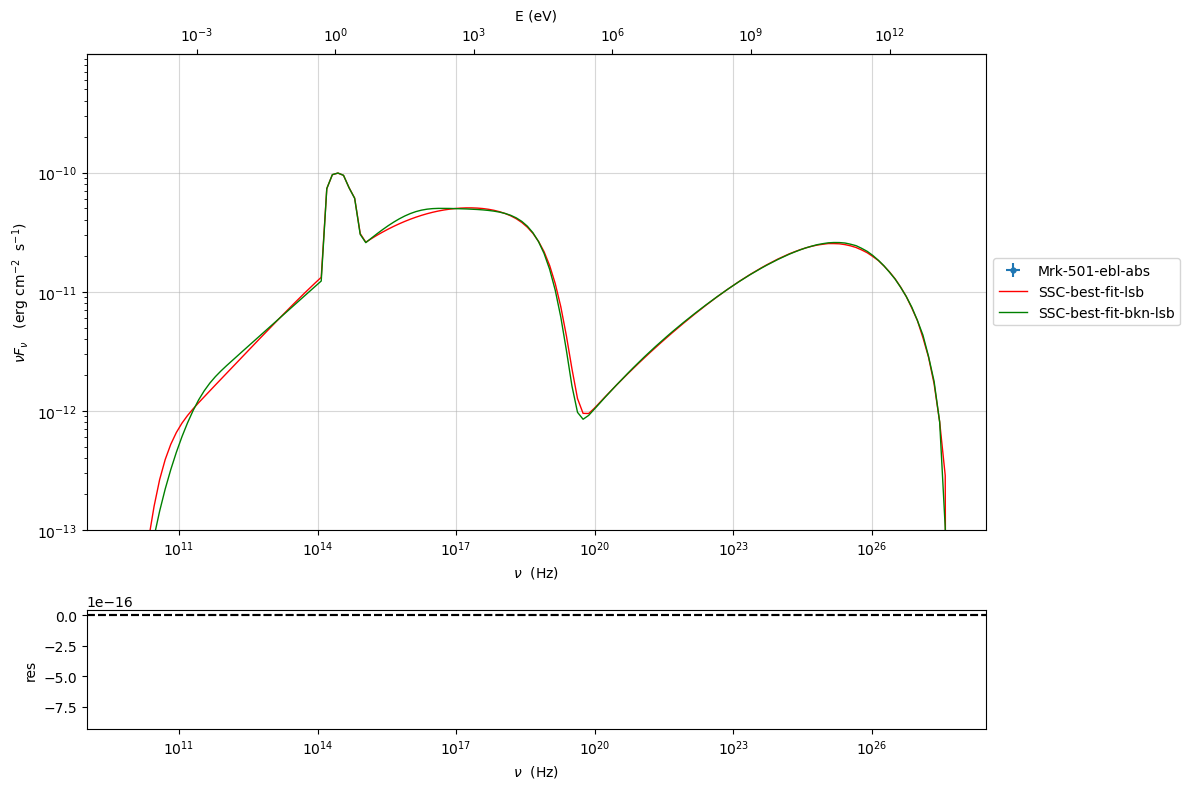

In [20]:
%matplotlib inline
from jetset.plot_sedfit import PlotSED
fit_model_lsb_bkn.set_nu_grid(1E6,1E30,200)
fit_model_lsb_bkn.eval()
p2=PlotSED()
p2.add_data_plot(sed_data,fit_range=[ 11,29])
p2.add_model_plot(fit_model_lsb,color='red')
p2.add_residual_plot(fit_model_lsb,sed_data,fit_range=[ 11,29],color='red')
p2.add_model_plot(fit_model_lsb_bkn,color='green')
p2.add_residual_plot(fit_model_lsb_bkn,sed_data,fit_range=[ 11,29],color='green')
p2.setlim(y_min=1E-13,x_min=1E9,x_max=3E28)

# MCMC

In [21]:
from jetset.mcmc import McmcSampler

We  used a flat prior  centered on the best fit value.   Setting `bound=5.0` and `bound_rel=True` means that:
    
1) the prior interval will be defined as  [best_fit_val - delta_m , best_fit_val + delta_p] 

2) with delta_p=delta_m=best_fit_val*bound

If we set `bound_rel=False` then   delta_p = delta_m = best_fit_err*bound

It is possible to define asymmetric boundaries e.g. `bound=[2.0,5.0]` meaning that 

1) for `bound_rel=True` 

     delta_p = best_fit_val*bound[1]

     delta_m =b est_fit_val*bound[0]

2)  for `bound_rel=False` 

    delta_p = best_fit_err*bound[1]

    delta_m = best_fit_err*bound[0]

In the next release a more flexible prior interface will be added, including different type of priors

Given the large parameter space, we select a sub sample of parameters using the `use_labels_dict`. If we do not pass the 'use_labels_dict' the full set of free parameters will be used


In [22]:
mcmc=McmcSampler(model_minimizer_lsb)
labels=['N','B','beam_obj','s','gamma0_log_parab']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}
mcmc.run_sampler(nwalkers=128,burnin=10,steps=50,bound=5.0,bound_rel=True,threads=None,walker_start_bound=0.005,use_labels_dict=use_labels_dict)


mcmc run starting



  0%|          | 0/50 [00:00<?, ?it/s]

mcmc run done, with 1 threads took 334.15 seconds


In [23]:
print(mcmc.acceptance_fraction)


0.5487500000000001


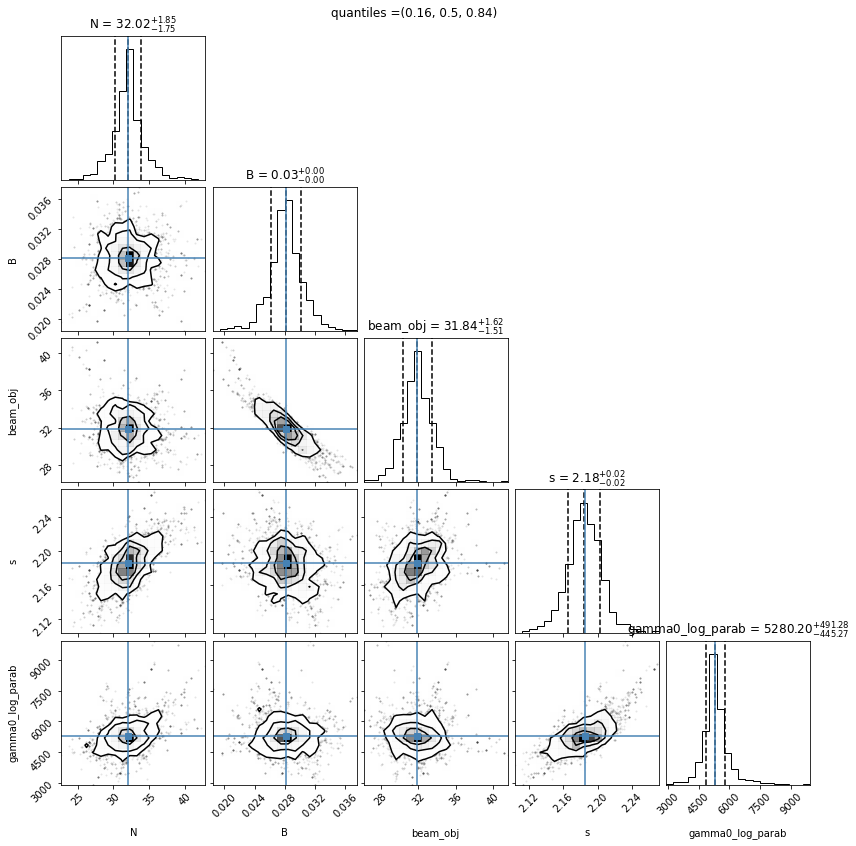

In [24]:
f=mcmc.corner_plot()


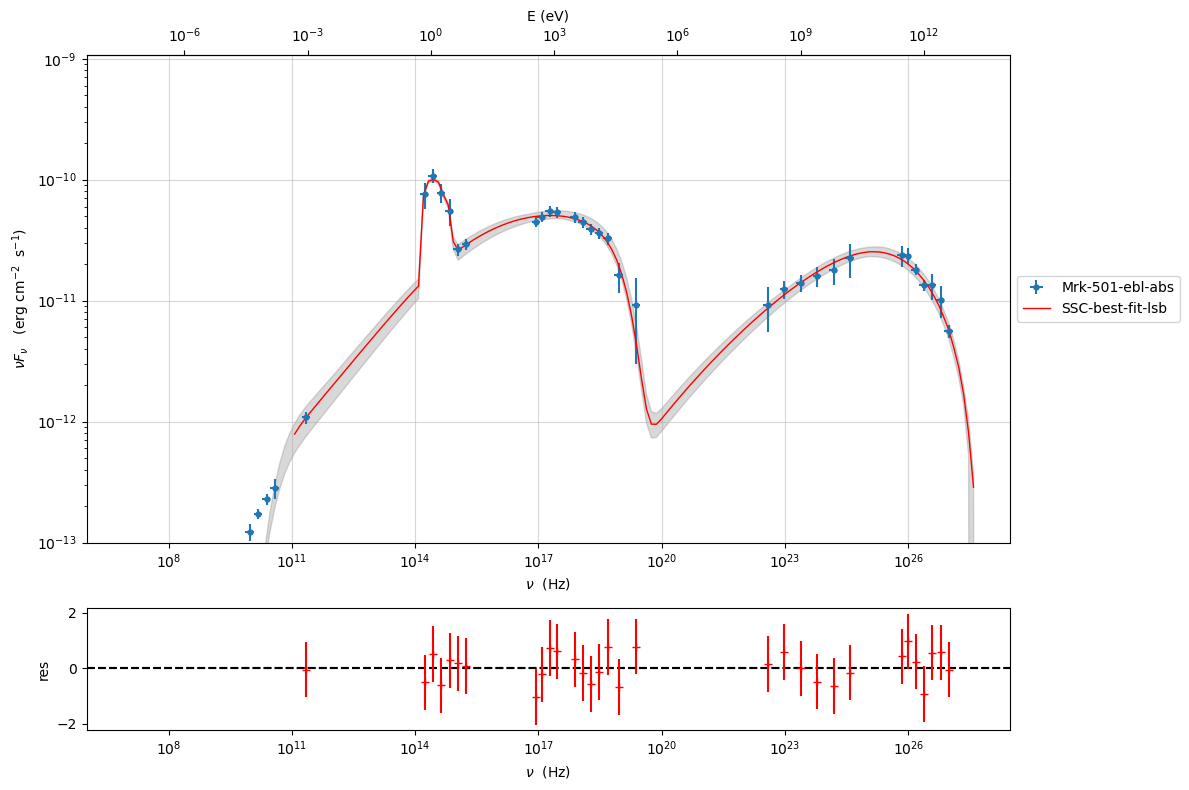

In [25]:
mcmc.model.nu_min=1E6
mcmc.model.jet_leptonic.nu_min=1E6
mcmc.model.eval()
p=mcmc.plot_model(sed_data=sed_data,fit_range=[1E11,5E27],size=50)
p.setlim(y_min=1E-13,x_min=1E6,x_max=3E28)

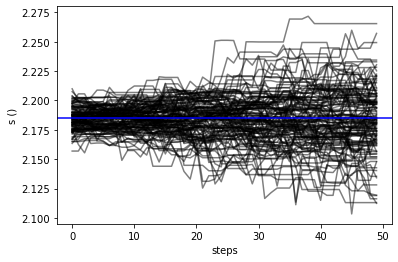

In [26]:
f=mcmc.plot_chain('s',log_plot=False)

In [27]:
mcmc.save('test_run_mcmc.pkl')

In [28]:
ms=McmcSampler.load('test_run_mcmc.pkl')


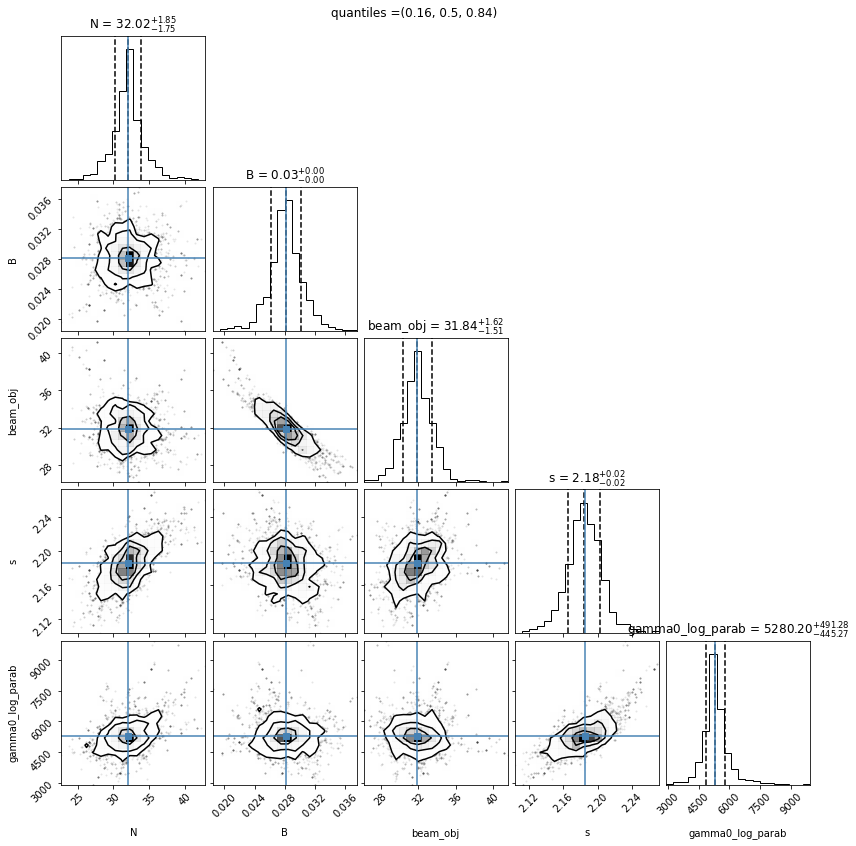

In [29]:
p=ms.corner_plot()


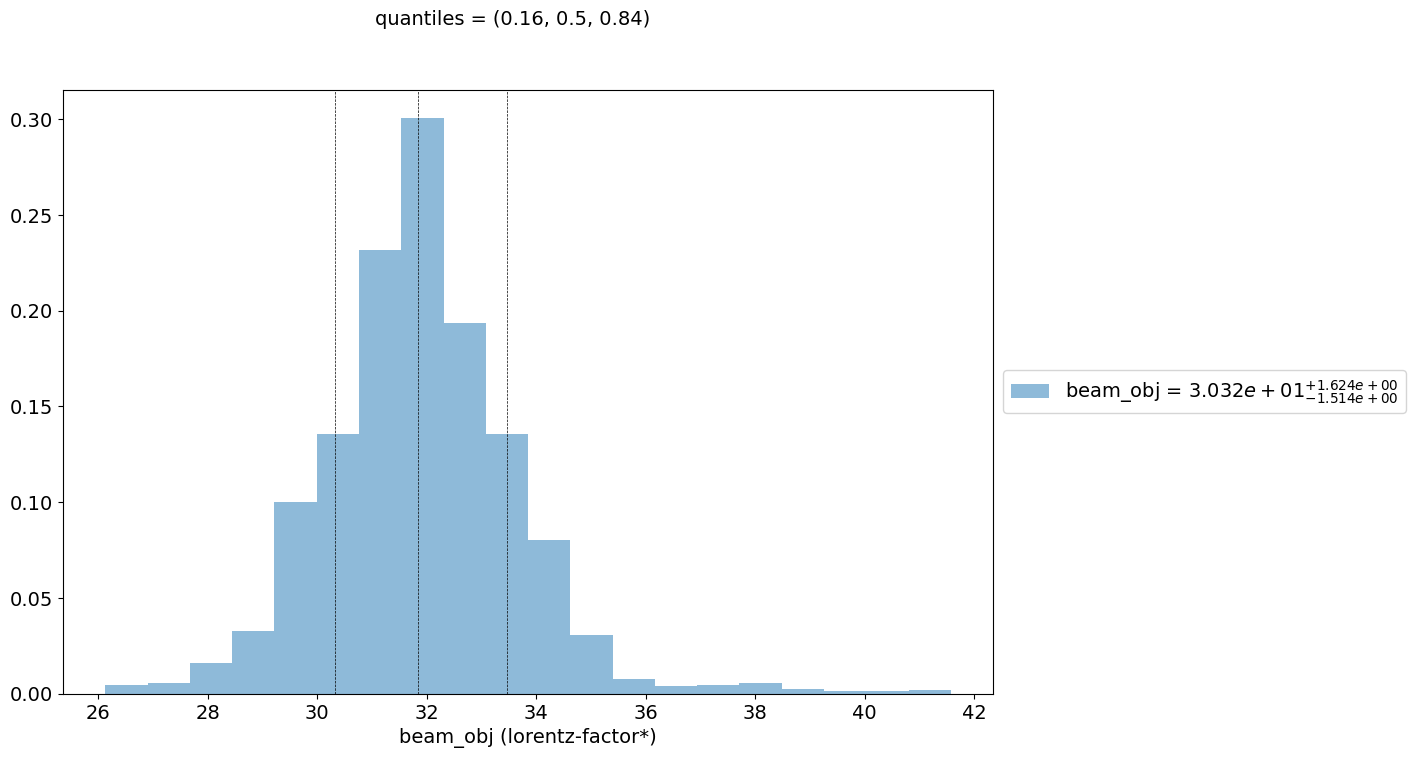

In [30]:
p=ms.plot_par('beam_obj',log_plot=False)


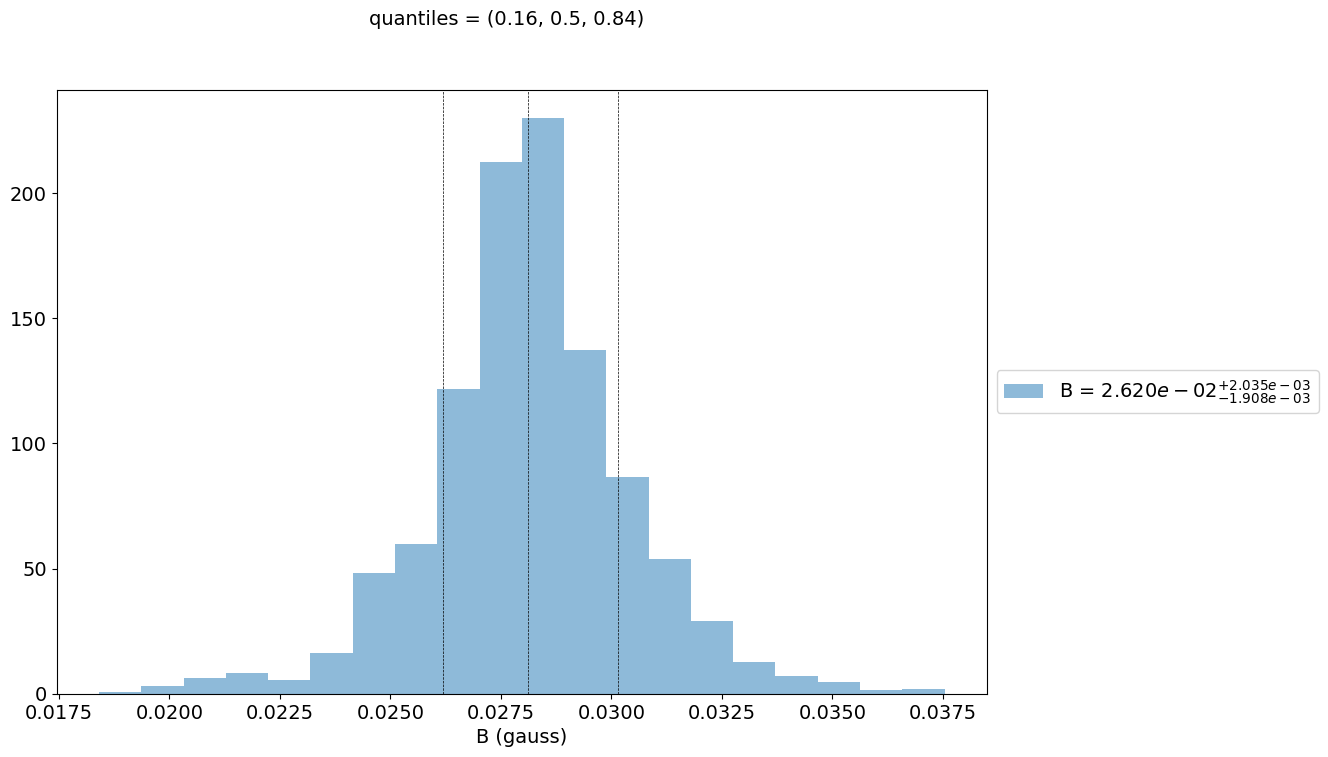

In [31]:
p=ms.plot_par('B',log_plot=False)


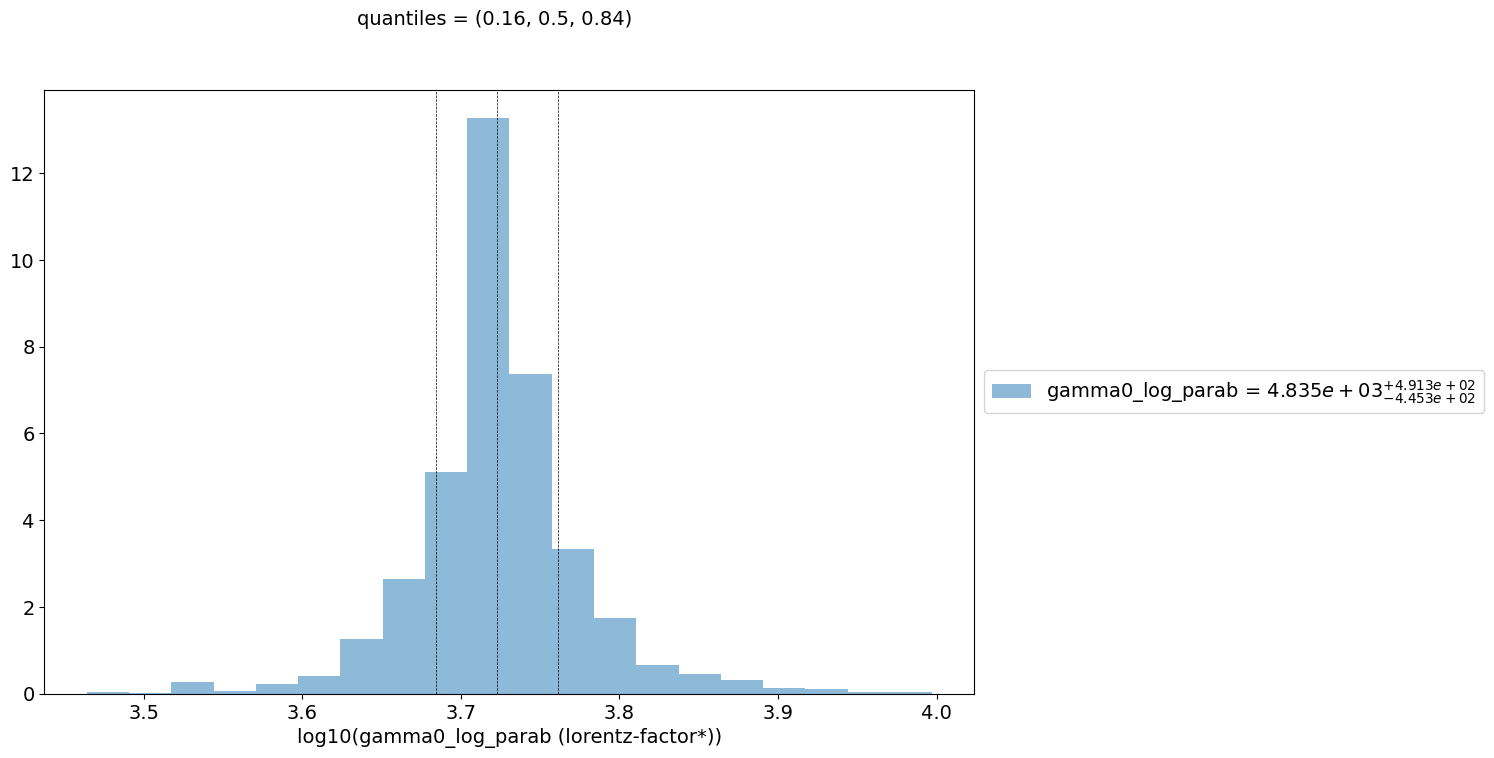

In [32]:
f=ms.plot_par('gamma0_log_parab',log_plot=True)


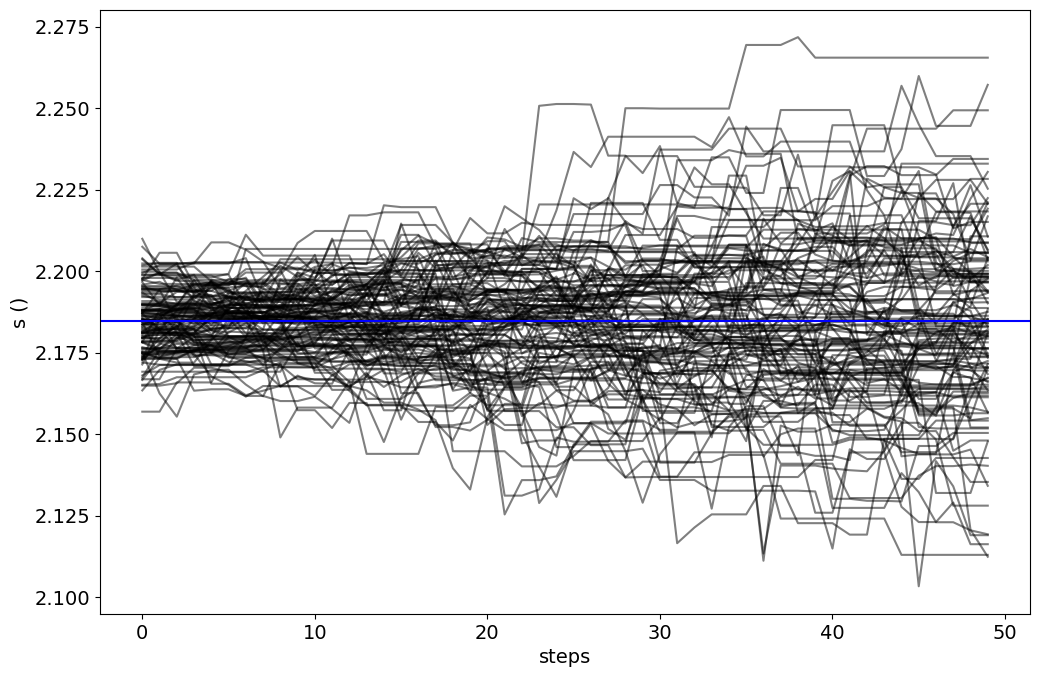

In [33]:
f=ms.plot_chain('s',log_plot=False)

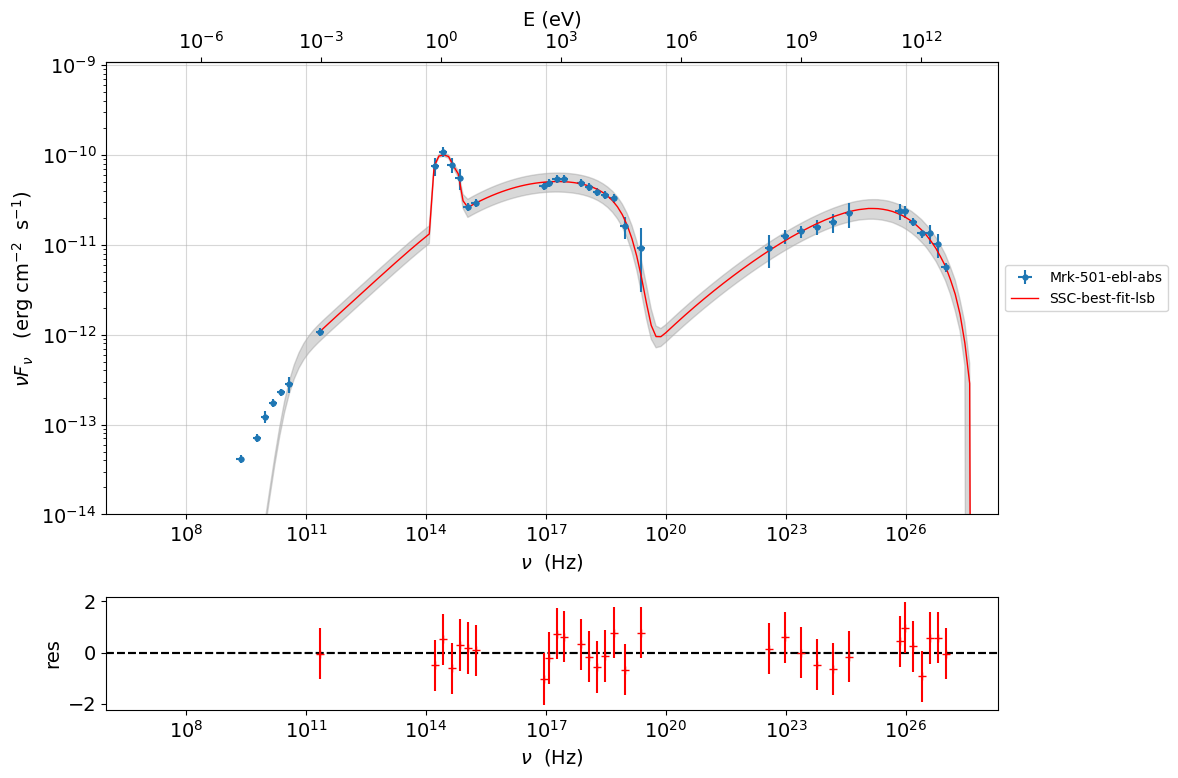

In [34]:
ms.model.nu_min=1E6
ms.model.jet_leptonic.nu_min=1E6
p=ms.plot_model(sed_data=sed_data,fit_range=[2E11, 2E28],size=50)
p.setlim(y_min=1E-14,x_min=1E6,x_max=2E28)